# 时间序列
* 利用Python进行数据分析 第十章

In [1]:
from datetime import datetime
from datetime import timedelta

from dateutil.parser import parse
from IPython.display import Image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 一、日期和时间数据类型及工具

In [6]:
now = datetime.now() # 以毫秒形式存储日期和时间

print(now)
now.year,now.month,now.day

2016-12-09 16:36:59.664719


(2016, 12, 9)

In [10]:
delta = datetime(2011,1,7) - datetime(2008,6,24,8,15)
print(delta)

print(delta.days)
delta.seconds

926 days, 15:45:00
926


56700

In [16]:
start = datetime(2011,1,7)
print(start)

print(start + timedelta(12))
start - 2 * timedelta(12)

2011-01-07 00:00:00
2011-01-19 00:00:00


datetime.datetime(2010, 12, 14, 0, 0)

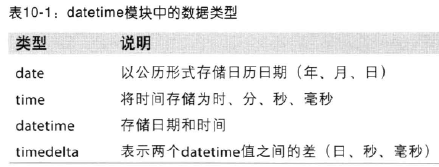

In [17]:
Image(filename="py35_picture\Datetime.png")

### 1 字符串和datetime的相互转换
* 利用str或strftime方法（传入一个格式化字符串），datetime对象和pandas的Timestamp对象可以被格式化为字符串

In [22]:
stamp = datetime(2011,1,3)

print(str(stamp))
stamp.strftime('%Y-%m-%d')

2011-01-03 00:00:00


'2011-01-03'

In [25]:
value = '2011-01-03'
print(datetime.strptime(value,'%Y-%m-%d')) # 通过已知格式进行日期解析的最佳方式

datestrs = ['7/6/2011','8/6/2011']
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

2011-01-03 00:00:00


[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [32]:
# 每次编写格式定义是很麻烦的事情，尤其是一些常见格式。可用dateutil中的parser.parse方法：
print(parse('2001-01-03')) # 可解析几乎所有的日期表示形式（中文除外）
print(parse('Jan 31, 1997 10:45 PM'))

parse('6/12/2011', dayfirst = True) # 日出现在月前面时

2001-01-03 00:00:00
1997-01-31 22:45:00


datetime.datetime(2011, 12, 6, 0, 0)

In [38]:
datestrs = ['7/6/2011','8/6/2011']
print(pd.to_datetime(datestrs)) # 可以解析多种不同的日期表示形式

idx = pd.to_datetime(datestrs + [None])
print(idx)
print(idx[2])
pd.isnull(idx)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)
NaT


array([False, False,  True], dtype=bool)

In [40]:
a = {'Year':np.arange(2010,2015),'Mon':np.arange(1,6),'Day':np.arange(10,15)}
data = pd.DataFrame(a)
data[['Year','Mon','Day']]

,Year,Mon,Day
0,2010,1,10
1,2011,2,11
2,2012,3,12
3,2013,4,13
4,2014,5,14


In [46]:
ymds = []
for i in range(len(data)):
    ymd = str(data['Year'][i]) + '/' + str(data['Mon'][i]) + '/' + str(data['Day'][i])
    ymds.append(ymd)
    print(ymd)
ymds

2010/1/10
2011/2/11
2012/3/12
2013/4/13
2014/5/14


['2010/1/10', '2011/2/11', '2012/3/12', '2013/4/13', '2014/5/14']

In [47]:
pd.to_datetime(ymds)

DatetimeIndex(['2010-01-10', '2011-02-11', '2012-03-12', '2013-04-13',
               '2014-05-14'],
              dtype='datetime64[ns]', freq=None)

In [56]:
data.columns = ['day','mon','year']
print(data)
data[['year','mon','day']]

   day  mon  year
0   10    1  2010
1   11    2  2011
2   12    3  2012
3   13    4  2013
4   14    5  2014


['year', 'mon', 'day']

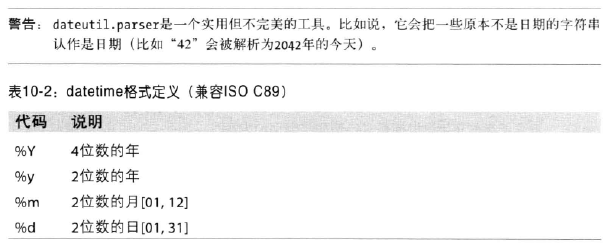

In [41]:
Image(filename="py35_picture\Datetime 1.png")

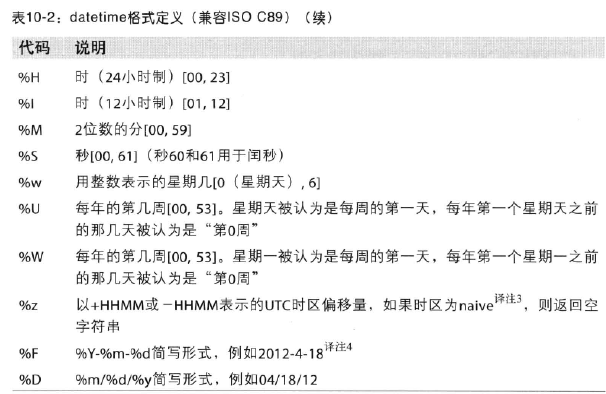

In [40]:
Image(filename="py35_picture\Datetime 2.png")

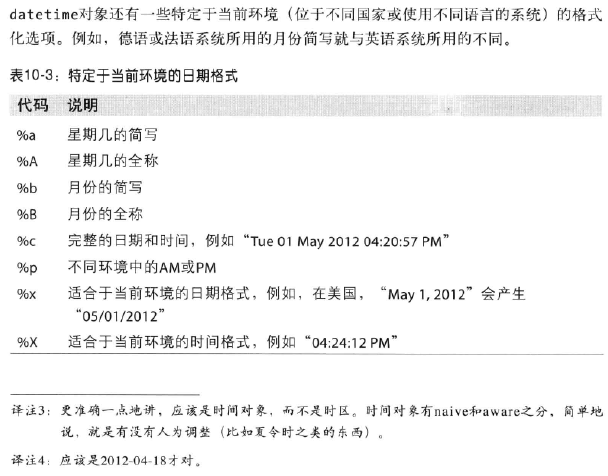

In [39]:
Image(filename="py35_picture\Datetime 3.png")

## 二、时间序列基础

In [2]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
 datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.randn(6), index = dates)
print(ts)
print()
print(type(ts))
print()
print(ts.index)

ts + ts[::2] # 不同索引的时间序列之间的算术运算会自动按日期对齐

2011-01-02   -0.916669
2011-01-05   -0.296275
2011-01-07   -0.052871
2011-01-08   -1.125371
2011-01-10    0.510460
2011-01-12    0.473304
dtype: float64

<class 'pandas.core.series.Series'>

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)


2011-01-02   -1.833338
2011-01-05         NaN
2011-01-07   -0.105741
2011-01-08         NaN
2011-01-10    1.020920
2011-01-12         NaN
dtype: float64

In [3]:
print(ts.index.dtype) # pandas 用Numpy的datetime数据类型以纳秒形式存储时间戳
print()

stamp = ts.index[0]
stamp

datetime64[ns]



Timestamp('2011-01-02 00:00:00')

### 1 索引、选取、子集构造

In [8]:
stamp = ts.index[2]
print(ts[stamp])
print()
print(ts['1/10/2011']) # 传入一个可以被解释为日期的字符串
print()
print(ts['20110110'])

-0.0528706465307

0.510460084351

0.510460084351


In [31]:
longer_ts = pd.Series(np.random.randn(1000),
                  index = pd.date_range('1/1/2000',periods=1000))

### 2 带有重复索引的时间序列
* 多个观测数据落在同一个时间点上

In [15]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000',
     '1/3/2000'])
print(dates)
print()
dup_ts = pd.Series(np.arange(5),index = dates)
print(dup_ts)
print()
print(dup_ts.index.is_unique) # 是否唯一

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-02', '2000-01-02',
               '2000-01-03'],
              dtype='datetime64[ns]', freq=None)

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

False


In [17]:
print(dup_ts['1/3/2000']) # 不重复
print()
print(dup_ts['1/2/2000']) #重复

4

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32


In [18]:
# 对具有非唯一时间戳的数据进行聚合：groupby（level= 0,索引的唯一一层）
grouped = dup_ts.groupby(level = 0)
print(grouped.mean())
print()
print(grouped.count())

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64
